In [137]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra

In [138]:
df = CSV.read("/Users/hamzah/Desktop/consolidated_players_dataset.csv")

# let's list all available categories, as well as their datatype using the "eltype" function.
feature_names = names(df)
for i in 1:length(feature_names)
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	2018-19			Int64
2	2019-20			Int64
3	2020-21			Int64
4	2021-22			Int64
5	2022-23			Int64
6	2023-24			Int64
7	2P			Float64
8	2P%			Float64
9	2PA			Float64
10	3P			Float64
11	3P%			Float64
12	3PA			Float64
13	AST			Float64
14	Age			Int64
15	BLK			Float64
16	DRB			Float64
17	FG			Float64
18	FG%			Float64
19	FGA			Float64
20	FT			Float64
21	FT%			Float64
22	FTA			Float64
23	G			Int64
24	GS			Int64
25	Guaranteed			Int64
26	MP			Float64
27	ORB			Float64
28	PF			Float64
29	PTS			Float64
30	Player			String
31	Pos			String
32	STL			Float64
33	Signed Using			Union{Missing, String}
34	TOV			Float64
35	TRB			Float64
36	eFG%			Float64


In [139]:
df = df[shuffle(1:end), :] # we shuffle the data so that our train/test split will be truly random

train_proportion = 0.6
n = size(df, 1)
println("Size of dataset: ", string(n))



# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))

target = df[:, :Guaranteed]
data = df[:, filter(col -> (col != :Guaranteed), feature_names)]


#Now we will split the data to create training, validation, and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+1:end, :]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+1:end, :]

# let's take a look
train_x

Size of dataset: 415


,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2P,2P%,2PA
,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,15400000,0,0,0,0,0,2.5,0.46,5.4
2,4000000,0,0,0,0,0,3.1,0.54,5.7
3,1874640,0,0,0,0,0,0.0,0.0,0.0
4,14975000,0,0,0,0,0,3.2,0.44,7.2
5,25434263,27093019,28751775,0,0,0,9.7,0.56,17.3
6,1621415,1845301,0,0,0,0,1.81,0.56,3.21
7,1641000,1719000,0,0,0,0,1.1,0.5,2.2
8,2760095,0,0,0,0,0,1.6,0.59,2.7
9,2667600,3117240,4781846,0,0,0,0.4,0.57,0.7


In [140]:
labels = [
  :AST,
  :PTS,
  :TRB,
]

3-element Array{Symbol,1}:
 :AST
 :PTS
 :TRB

In [141]:
# the following variable should have as many columns as the labels, and as many rows as examples in the training set      
train_vals = train_x[:,labels]
# the following variable should have as many columns as real variables, and as many rows as examples in the test set      
test_vals = test_x[:,labels]

,AST,PTS,TRB
,Float64,Float64,Float64
1,6.1,18.5,10.7
2,2.9,8.0,2.9
3,3.2,7.9,3.2
4,3.0,16.7,3.9
5,1.6,11.0,3.1
6,3.7,20.5,3.8
7,0.2,2.9,1.5
8,3.2,9.5,2.3
9,5.3,12.4,2.5


In [142]:
Xtrain = convert(Matrix,train_vals)
Xtest = convert(Matrix,test_vals)

166×3 Array{Float64,2}:
 6.1   18.5  10.7
 2.9    8.0   2.9
 3.2    7.9   3.2
 3.0   16.7   3.9
 1.6   11.0   3.1
 3.7   20.5   3.8
 0.2    2.9   1.5
 3.2    9.5   2.3
 5.3   12.4   2.5
 0.7    4.1   1.6
 1.2    6.5   9.1
 9.6   19.4   3.6
 0.0    0.0   1.0
 ⋮           
 4.0   15.1   2.3
 3.9   16.1   5.4
 1.0    5.8   1.4
 1.0   14.0  11.4
 1.0   11.2   2.8
 3.2   22.9  11.0
 3.4   21.4   4.0
 3.2   10.2   5.1
 4.7   24.9   4.5
 0.4    4.9   4.1
 3.22   8.6   2.42
 0.0    2.0   1.0

In [143]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    "Fill this in."
    MSE = mean((y - pred).^2)
end

"""This completed function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This completed helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This completed function plots the predicted labels vs the actual labels
(We only plots the first 1000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 125)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

plot_pred_true

In [144]:
# The weights of your linear equation (compute via least squares)
w = Xtrain\train_y

#Your prediction vectors
train_pred = Xtrain * w
test_pred = Xtest * w

#The mean squared error for your predictions.
train_MSE = MSE(train_y, train_pred)
test_MSE = MSE(test_y, test_pred)

9.387645036849145e14

Train MSE	3.3837762342865775e14
Test MSE 	9.387645036849145e14


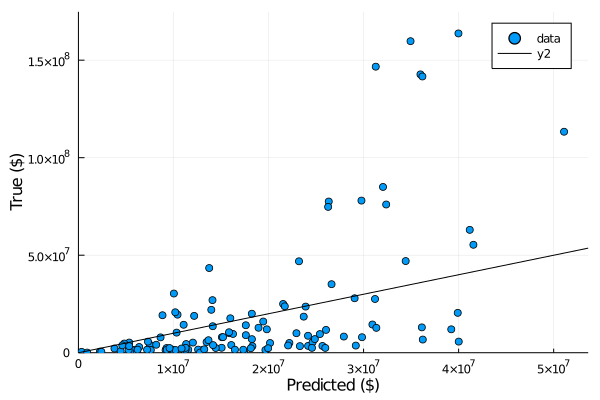

In [145]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)